In [19]:
%load_ext autoreload
%autoreload 2
%cd '/workspaces/polarization_reddit'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from load.utils import load_users, load_subreddits, load_comments, save_df_as_json
from preprocessing.utils import calculate_user_party

: 

### User Affiliation

In [13]:
subreddits = load_subreddits()[["subreddit", "party"]]
# Filter partisan subreddits
subreddits = subreddits[subreddits["party"].isin({'dem', 'rep'})]

comments = load_comments(year=2008, start_month=1, stop_month=1)[["author", "subreddit"]]

In [14]:
comments_party = comments.merge(subreddits, on="subreddit", how="inner")

display(comments_party)

,author,subreddit,party
0,Tf4ZF,obama,dem
1,BC8mV,obama,dem
2,Qy2Wb,obama,dem
3,EWGBu,obama,dem
4,o4KNs,obama,dem
5,sqFFO,obama,dem
6,sfKft,obama,dem
7,Oqqbs,obama,dem
8,q4bcS,obama,dem
9,0rflO,obama,dem


In [15]:
user_party = comments_party.groupby(by="author").apply(calculate_user_party)
df.reset_index(inplace=True)
display(user_party)


,dem_cnt,rep_cnt,score,party
author,,,,
0rflO,1,0,1,dem
2Ee9O,1,0,1,dem
2Zbgq,1,0,1,dem
BC8mV,3,0,3,dem
DiWDS,1,0,1,dem
EWGBu,2,0,2,dem
M4zOB,3,0,3,dem
Oqqbs,1,0,1,dem
Qy2Wb,1,0,1,dem


party
dem    AxesSubplot(0.125,0.11;0.775x0.77)
Name: party, dtype: object

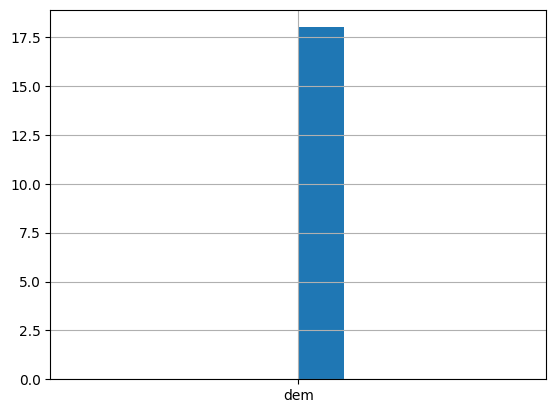

In [16]:
user_party.groupby("party")["party"].hist()

In [18]:
save_df_as_json(data=user_party, target_file="user_party.json")